# Project Title: Video Game Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../Dataset/vgsales.csv")

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# 1 Data Preparation:

In [4]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
df.Year=df.Year.fillna(0)

In [8]:
df.Publisher=df.Publisher.fillna('unknown')

In [9]:
df.Year=df.Year.astype('int64')

# 2. Exploratory Data Analysis (EDA):

In [10]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.647307,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.346809,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
df.Name.value_counts()

Name
Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: count, Length: 11493, dtype: int64

In [12]:
df.Platform.value_counts()


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [13]:
df.Genre.value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [14]:
df.Publisher.value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Glams                              1
Locus                              1
Warp                               1
Elite                              1
UIG Entertainment                  1
Name: count, Length: 579, dtype: int64

###  Calculate total and average sales by region, platform, and genre
 

In [15]:
ab=df.groupby(['Platform', 'Genre'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].agg(['sum', 'mean'])
ab

NA_Sales           EU_Sales           JP_Sales  \
                           sum      mean      sum      mean      sum   
Platform Genre                                                         
2600     Action          27.39  0.449016     1.64  0.026885     0.00   
         Adventure        1.59  0.795000     0.10  0.050000     0.00   
         Fighting         1.16  0.580000     0.07  0.035000     0.00   
         Misc             3.34  0.668000     0.20  0.040000     0.00   
         Platform        12.38  1.375556     0.72  0.080000     0.00   
...                        ...       ...      ...       ...      ...   
XOne     Role-Playing     5.56  0.427692     3.06  0.235385     0.01   
         Shooter         31.78  0.963030    15.27  0.462727     0.16   
         Simulation       0.28  0.093333     0.21  0.070000     0.00   
         Sports          14.26  0.396111     7.67  0.213056     0.02   
         Strategy         0.26  0.086667     0.10  0.033333     0.00   

                                Other_Sales           Global_Sales            
                           mean         sum      mean          sum      mean  
Platform Genre                                                                
2600     Action        0.000000        0.22  0.003607        29.34  0.480984  
         Adventure     0.000000        0.01  0.005000         1.70  0.850000  
         Fighting      0.000000        0.01  0.005000         1.24  0.620000  
         Misc          0.000000        0.03  0.006000         3.58  0.716000  
         Platform      0.000000        0.16  0.017778        13.27  1.474444  
...                         ...         ...       ...          ...       ...  
XOne     Role-Playing  0.000769        0.83  0.063846         9.48  0.729231  
         Shooter       0.004848        4.38  0.132727        51.61  1.563939  
         Simulation    0.000000        0.05  0.016667         0.54  0.180000  
         Sports        0.000556        2.03  0.056389        23.97  0.665833  
         Strategy      0.000000        0.03  0.010000         0.38  0.126667  

[293 rows x 10 columns]

### Visualize distributions using Seaborn histograms and box plots.

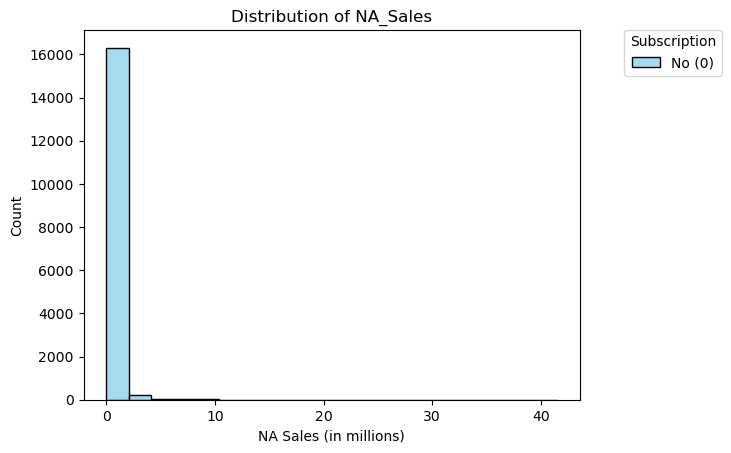

In [16]:
sb.histplot(x=df.NA_Sales,bins=20,color='skyblue', edgecolor='black')
plt.title('Distribution of NA_Sales')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('Count')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.3,1.02))
plt.show()

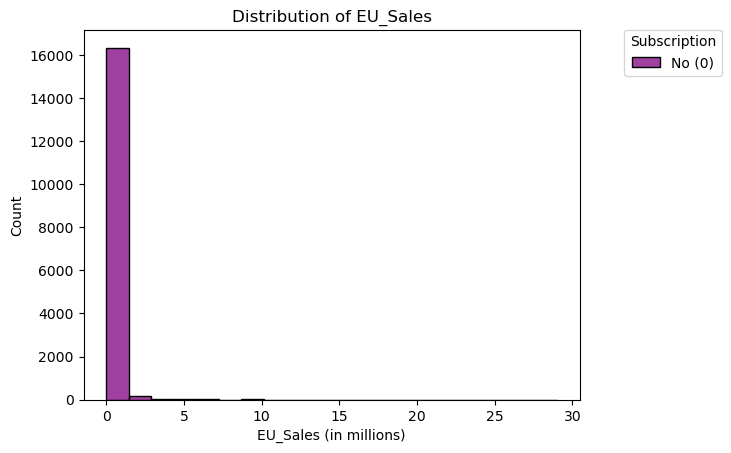

In [17]:
sb.histplot(x=df.EU_Sales,bins=20,color='purple')
plt.title('Distribution of EU_Sales')
plt.xlabel('EU_Sales (in millions)')
plt.ylabel('Count')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.3,1.02))
plt.show()

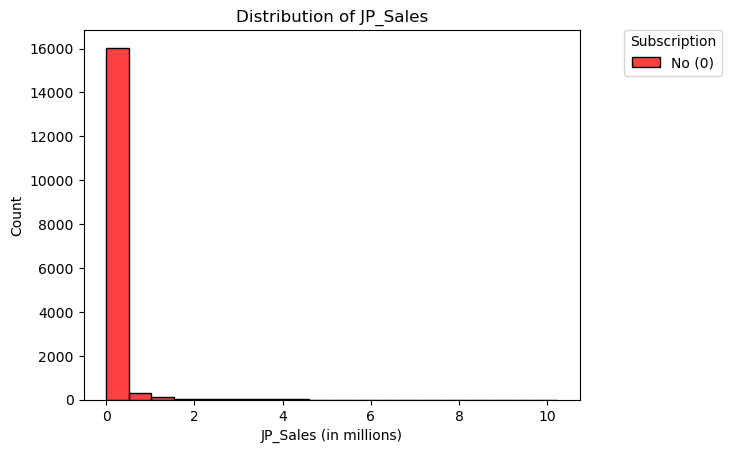

In [18]:
sb.histplot(x=df.JP_Sales,bins=20,color='red')
plt.title('Distribution of JP_Sales')
plt.xlabel('JP_Sales (in millions)')
plt.ylabel('Count')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.3,1.02))
plt.show()

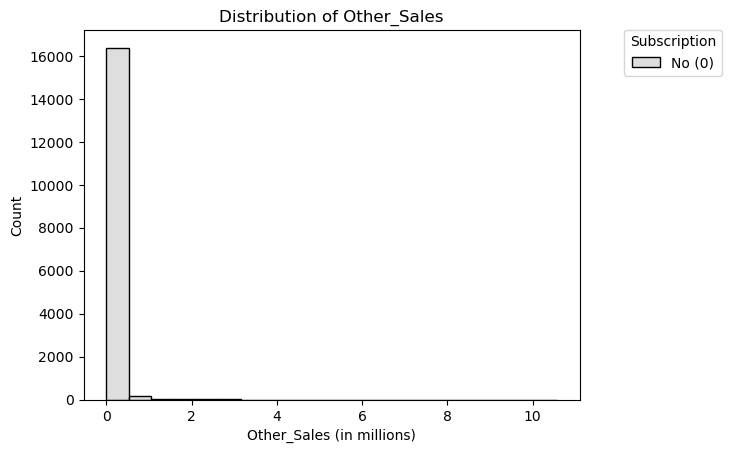

In [19]:
sb.histplot(x=df.Other_Sales,bins=20,color='lightgray')
plt.title('Distribution of Other_Sales')
plt.xlabel('Other_Sales (in millions)')
plt.ylabel('Count')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.3,1.02))
plt.show()

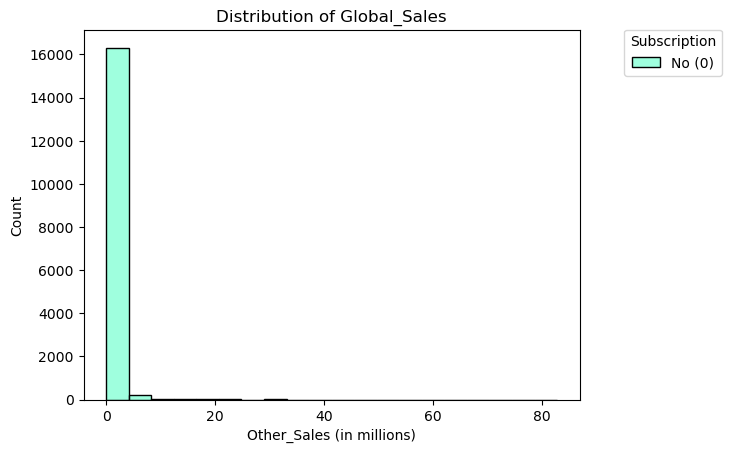

In [20]:
sb.histplot(x=df.Global_Sales,bins=20,color='aquamarine')
plt.title('Distribution of Global_Sales')
plt.xlabel('Other_Sales (in millions)')
plt.ylabel('Count')
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.3,1.02))
plt.show()

# 3. Top Selling Games Analysis:

### What are the top-selling games based on global sales revenue?

In [21]:
df.sort_values(by='Global_Sales',ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16189,BattleForge,PC,2009,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16187,16190,Jewel Quest II,PC,2007,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16189,16192,Sonic & All-Stars Racing Transformed,PC,2013,Racing,Sega,0.00,0.01,0.00,0.00,0.01


### What is the total global sales revenue across all years?

In [22]:
 df['Global_Sales'].sum()

8920.44

# 4. Platform Performance Analysis:

###  Which platform has the highest total global sales revenue?

In [23]:
tt=df.groupby('Platform')['Global_Sales'].sum()
bcd=tt.nlargest()
bcd

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
Name: Global_Sales, dtype: float64

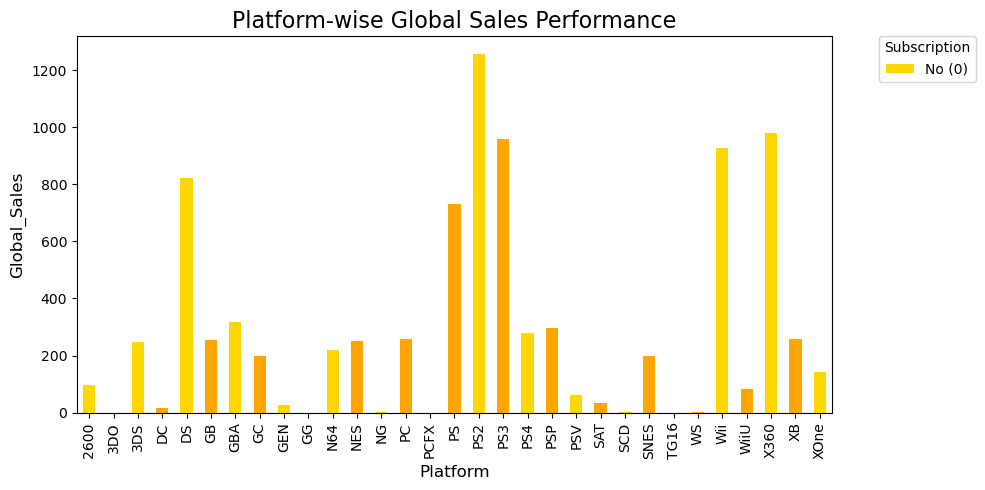

In [24]:
tt.plot(kind='bar',stacked=True,figsize=(10,5),color=['gold','orange'])
plt.title('Platform-wise Global Sales Performance', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global_Sales', fontsize=12)
plt.legend(['No (0)','Yes (1)'],title='Subscription',bbox_to_anchor=(1.2,1.02))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Genre Analysis:

### What are the most popular genres in terms of global sales revenue?

In [25]:
aw=df.groupby('Genre')['Global_Sales'].sum()

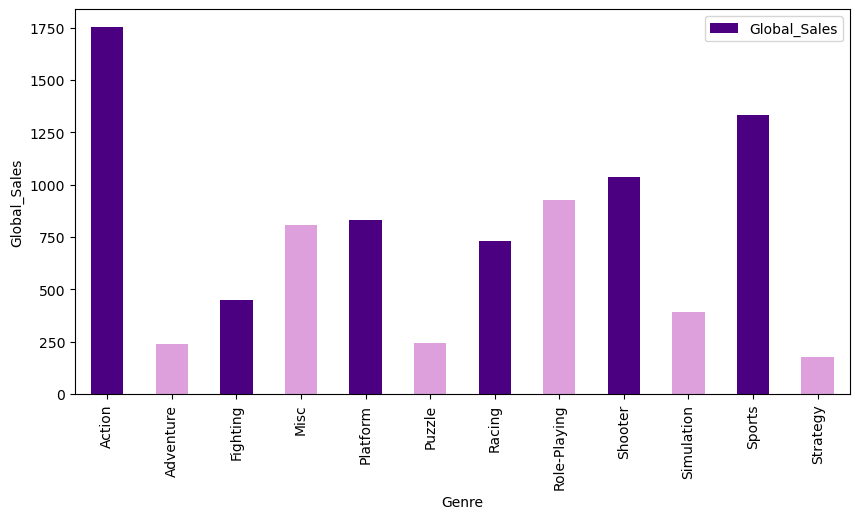

In [26]:
aw.plot(kind='bar',stacked=True,figsize=(10,5),color=['indigo','plum'])
sb.barplot(x=df.Genre,y=df.Global_Sales)
plt.xticks(rotation=90)
plt.show()

###  Are certain genres more successful on specific platforms or in particular regions?

In [27]:
tg=df.loc[(df.Year != 0) & (df.Genre) & (df.Global_Sales)]
gb=tg.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
gb

,Year,Genre,Global_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.71
3,1980,Shooter,7.07
4,1980,Sports,0.49
...,...,...,...
384,2016,Sports,14.60
385,2016,Strategy,0.50
386,2017,Action,0.01
387,2017,Role-Playing,0.04


###  Can weidentify any emerging trends or shifts in genre preferences over time?

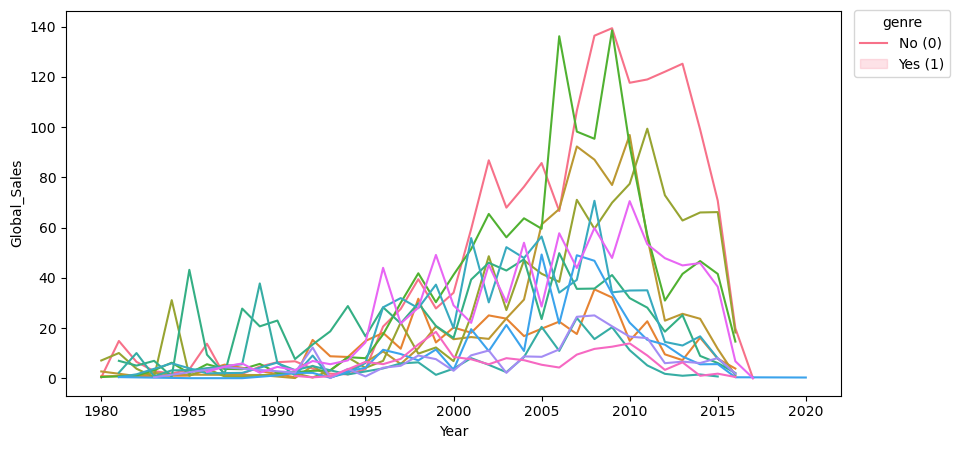

In [28]:
plt.figure(figsize=(10,5))
sb.lineplot(x=gb.Year,y=gb.Global_Sales,hue=gb.Genre)
plt.legend(['No (0)','Yes (1)'],title='genre',bbox_to_anchor=(1.15,1.02))
plt.show()

# 6.Publisher Performance:

### Which publisher has the highest total global sales revenue according to genre?

In [29]:
df.groupby('Publisher')['Global_Sales'].sum().reset_index()

,Publisher,Global_Sales
0,10TACLE Studios,0.11
1,1C Company,0.10
2,20th Century Fox Video Games,1.94
3,2D Boy,0.04
4,3DO,10.12
...,...,...
574,imageepoch Inc.,0.04
575,inXile Entertainment,0.10
576,"mixi, Inc",0.86
577,responDESIGN,0.13


###  How does the performance of publishers vary in different regions?

In [30]:
ap=df.groupby('Publisher')['Global_Sales'].sum().nlargest(10).reset_index()

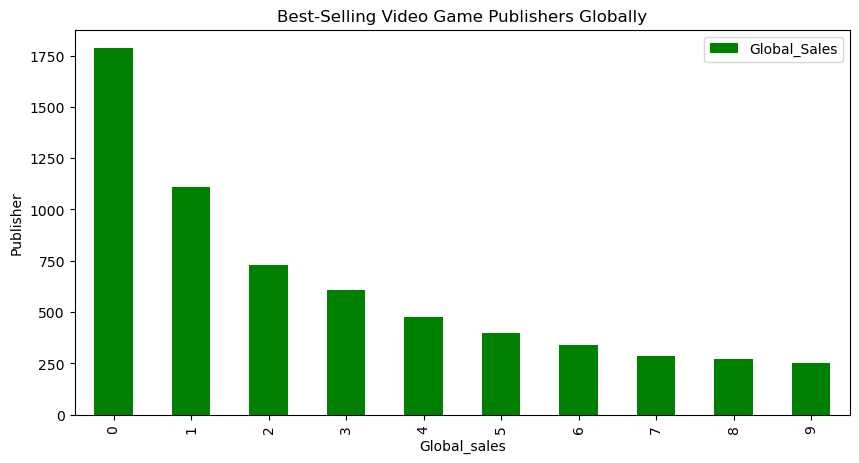

In [31]:
ap.plot(kind='bar',stacked=True,figsize=(10,5),color=['green'])
plt.title('Best-Selling Video Game Publishers Globally')
plt.xlabel('Global_sales')
plt.ylabel('Publisher')
plt.show()

# 7. Regional Sales Analysis:

###  How do sales revenues vary across different regions

In [32]:
df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...
imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,0.02,0.06,0.00,0.01,0.10
"mixi, Inc",0.00,0.00,0.86,0.00,0.86


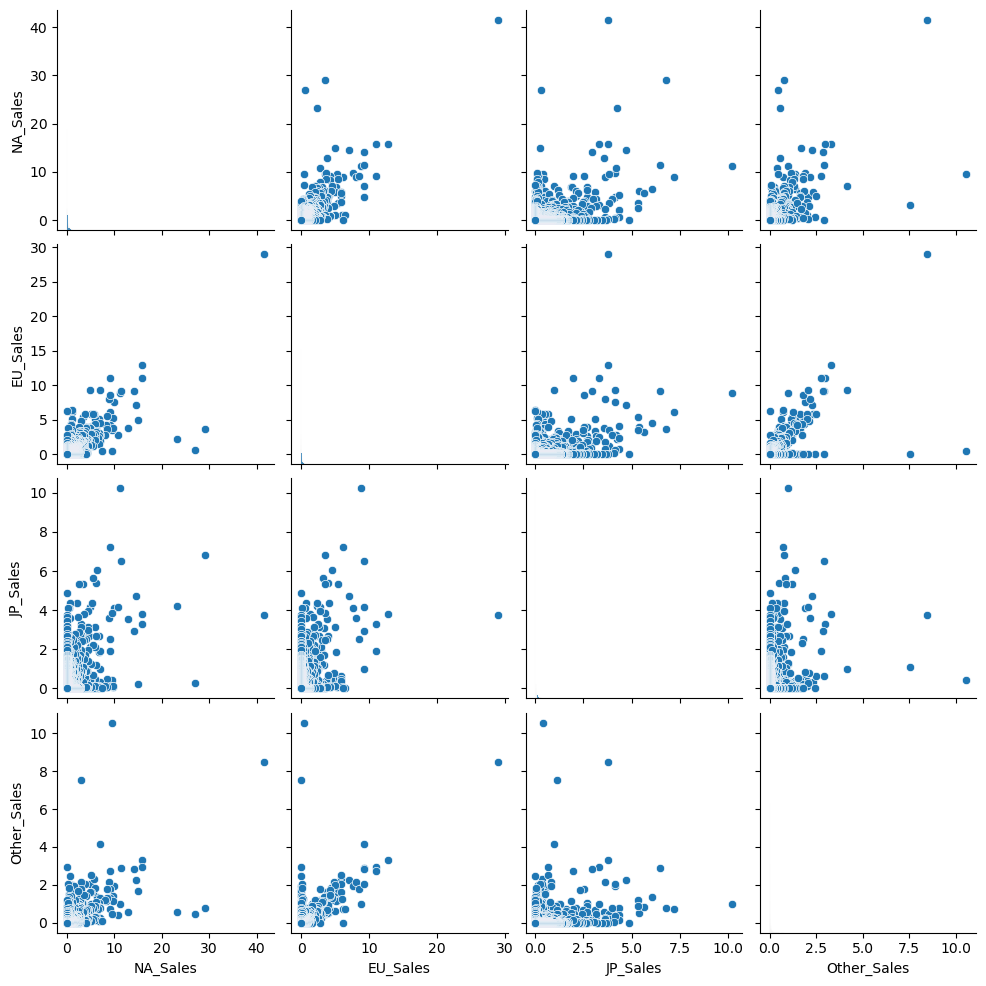

In [33]:
xy=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sb.pairplot(xy)
plt.show()

###  Can we identify any regional preferences or trends in gaming preferences?

In [34]:
gb=df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
gb

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59
Puzzle,123.78,50.78,57.31,12.55
Racing,359.42,238.39,56.69,77.27
Role-Playing,327.28,188.06,352.31,59.61
Shooter,582.60,313.27,38.28,102.69


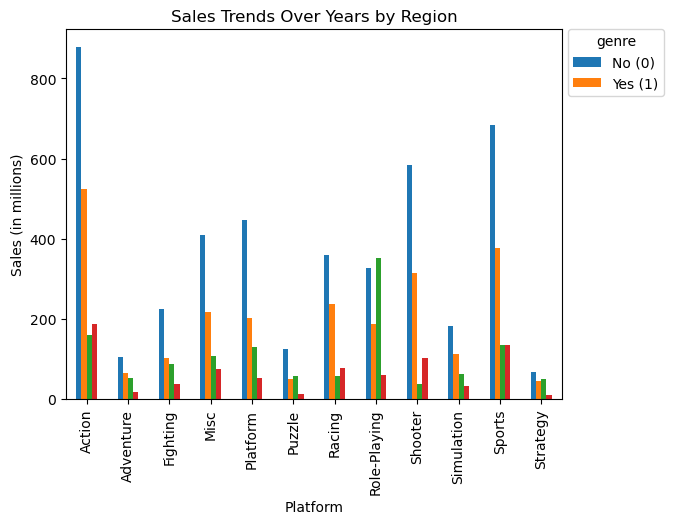

In [35]:
gb.plot(kind='bar')
plt.title('Sales Trends Over Years by Region')
plt.ylabel('Sales (in millions)')
plt.xlabel('Platform')
plt.legend(['No (0)','Yes (1)'],title='genre',bbox_to_anchor=(1.22,1.02))
plt.show()